In [1]:
# February 11st, 2020
# Script to draw Originality and generality graphs from different Classification systems

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import sys
sys.path.append('/home/rkogeyam/scripts/')
sys.path.append('scripts/')

from determinants_scripts import classes, dtypes

originality='data/originality_classes.csv'
generality='data/generality_classes.csv'
patent='data/cleanpatent.csv'


usecols=['id', 'date']
df=pd.read_csv(patent, usecols=usecols, parse_dates=['date'], index_col='id')
df_orig=pd.read_csv(originality, index_col='patent_id')

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

In [4]:
df.index = df.index.map(str)
df_orig.index = df_orig.index.map(str)
df_orig=df_orig.join(df)
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91453297 entries, 3930271 to RE46653
Data columns (total 5 columns):
wipo    float64
ipcr    float64
cpc     float64
nber    float64
date    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.1+ GB


In [5]:
df_orig.head()

,wipo,ipcr,cpc,nber,date
3930271,NaN,NaN,NaN,NaN,1976-01-06
3930271,NaN,NaN,NaN,NaN,1976-01-06
3930272,NaN,NaN,NaN,NaN,1976-01-06
3930272,NaN,NaN,NaN,NaN,1976-01-06
3930272,NaN,NaN,NaN,NaN,1976-01-06


In [6]:
df_orig.describe()

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,wipo,ipcr,cpc,nber
count,8.785518e+07,8.935392e+07,8.785815e+07,8.783675e+07
mean,3.855030e-01,5.405826e-01,3.985988e-01,4.212208e-01
std,2.649233e-01,2.609504e-01,2.651387e-01,2.589246e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,9.391847e-01,9.482249e-01,9.485207e-01,9.458677e-01


/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


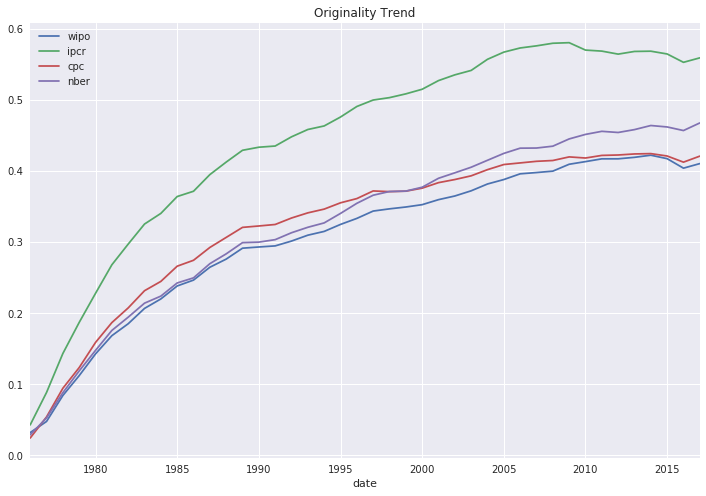

In [7]:
fig, ax=plt.subplots(figsize=(12,8))
ax=df_orig.groupby(pd.Grouper(key='date', freq="A")).mean().plot(ax=ax)
ax.set_title('Originality Trend')
plt.savefig('img/trend_originality.png') 
plt.show()               

In [8]:
df_gener=pd.read_csv(generality, index_col='citation_id')

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_gener.index = df_gener.index.map(str)
df_gener=df_gener.join(df)
df_gener.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91453298 entries, 0 to re25727
Data columns (total 5 columns):
wipo    float64
ipcr    float64
cpc     float64
nber    float64
date    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.1+ GB


/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


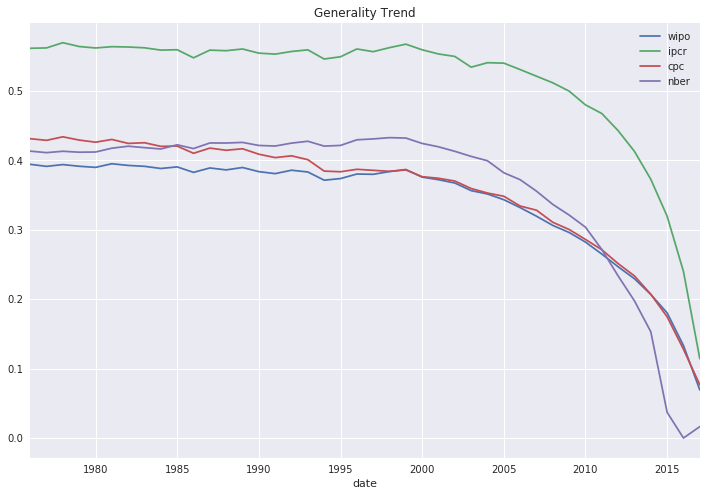

In [10]:
fig, ax=plt.subplots(figsize=(12,8))
ax=df_gener.groupby(pd.Grouper(key='date', freq="A")).mean().plot(ax=ax)
ax.set_title('Generality Trend')
plt.savefig('img/trend_generality.png') 
plt.show()               